In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import shap
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df = pd.read_csv('./arabidopsis_3mers.csv')

# Recombination smoothing

In [3]:
df = df
df['srec'] = 0

for i in  range(1, len(df)):
    if df.loc[i-1,'chromosome'] == df.loc[i,'chromosome']:
        df.loc[i, 'srec'] = df.loc[i-1, 'rec']*0.1 + df.loc[i-1, 'srec']*0.9

# Chromosome Split

Testing data with chromosome info

In [4]:
# Dataframes with chrs info
chr1 = df[df["chromosome"] == "chr1"]
chr2 = df[df["chromosome"] == "chr2"]
chr3 = df[df["chromosome"] == "chr3"]
chr4 = df[df["chromosome"] == "chr4"]
chr5 = df[df["chromosome"] == "chr5"]

Training data without the chromosome to be predicted

In [5]:
# Dataframes with the remaining chrs info
achr1 = df[df["chromosome"] != "chr1"]
achr2 = df[df["chromosome"] != "chr2"]
achr3 = df[df["chromosome"] != "chr3"]
achr4 = df[df["chromosome"] != "chr4"]
achr5 = df[df["chromosome"] != "chr5"]

# Model Predictions

Predictions on each chromosome, using the information from the remaining chromosomes as a training set. For example, if chromosome 1 is to be predicted, the training set will be composed of chromosomes 2, 3, 4.... etc. 

Correlation: 0.6175036491711259
Coefficient of Determination: 0.33803441533020506
Mean Squared Error: 0.017753818402671206


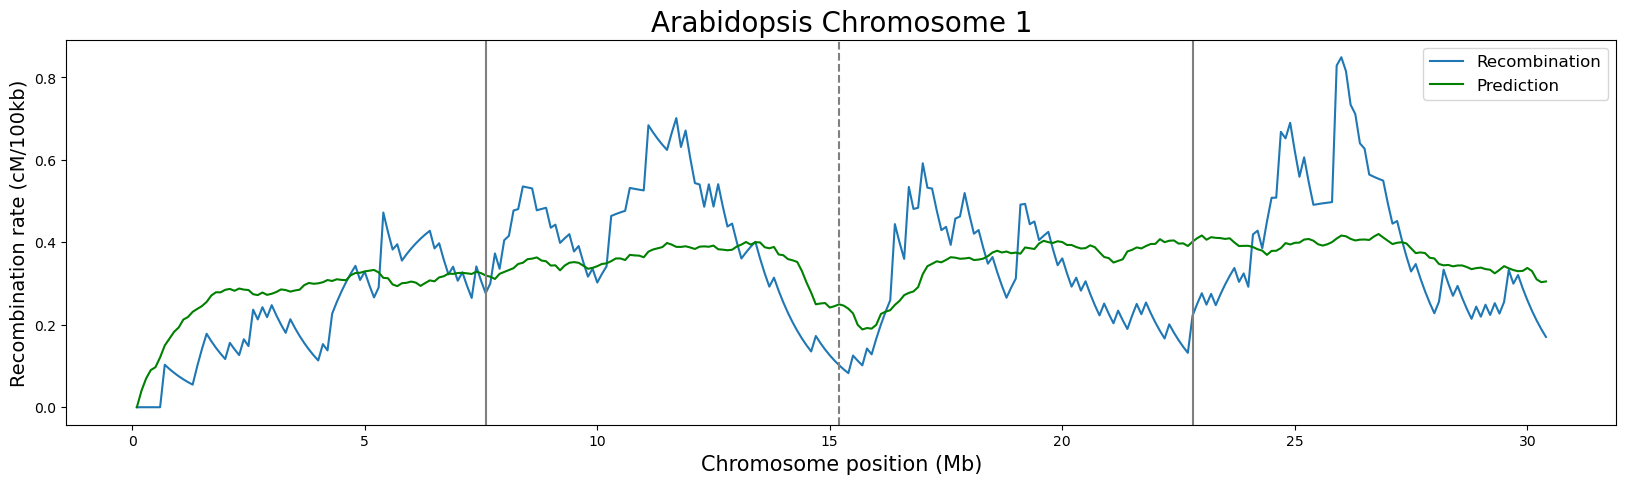

In [6]:
# TRAINING MODEL
X = achr1.drop(['chromosome','window_start','window_end','rec','srec'],axis=1)
y = achr1.srec
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = LinearRegression()
model.fit(X_train, y_train)
model_preds = model.predict(chr1.drop(['chromosome','window_start','window_end','rec','srec'], axis=1))

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr1 = model_spreds      
    
#PARAMETERS
corr_chr1 = pearsonr(chr1.srec, pchr1)
r2_chr1 = r2_score(chr1.srec, pchr1)
mse_chr1 = mean_squared_error(chr1.srec, pchr1)
print('Correlation:', corr_chr1[0])
print('Coefficient of Determination:', r2_chr1)
print('Mean Squared Error:', mse_chr1)

#CORRELATIONS BY QUARTILES
c_q1 = int(len(chr1)*0.25)
c_q2 = int(len(chr1)*0.50)
c_q3 = int(len(chr1)*0.75)

rq1 = chr1['srec'].iloc[0:c_q1]
rq2 = chr1['srec'].iloc[c_q1:c_q2]
rq3 = chr1['srec'].iloc[c_q2:c_q3]
rq4 = chr1['srec'].iloc[c_q3:int(len(chr1))]

pq1 = pchr1[0:c_q1]
pq2 = pchr1[c_q1:c_q2]
pq3 = pchr1[c_q2:c_q3]
pq4 = pchr1[c_q3:int(len(chr1))]

corr_chr1_q1 = pearsonr(rq1, pq1)
corr_chr1_q2 = pearsonr(rq2, pq2)
corr_chr1_q3 = pearsonr(rq3, pq3)
corr_chr1_q4 = pearsonr(rq4, pq4)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr1. window_end,chr1.srec, label='Recombination')
ax.plot(chr1. window_end,pchr1, label = 'Prediction',  color ='green')
plt.title('Arabidopsis Chromosome 1',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))

chr_len = chr1["window_end"].iloc[-1]
q1 =round(chr_len * 0.25 / 100000) * 100000
q2 =round(chr_len* 0.50 / 100000) * 100000
q3 =round(chr_len * 0.75 / 100000) * 100000

plt.axvline(x=q1, color='gray', linestyle='-')
plt.axvline(x=q2, color='gray', linestyle='--')
plt.axvline(x=q3, color='gray', linestyle='-')
plt.show()

Correlation: 0.4908045311744278
Coefficient of Determination: 0.20895594831223863
Mean Squared Error: 0.012773193052940758


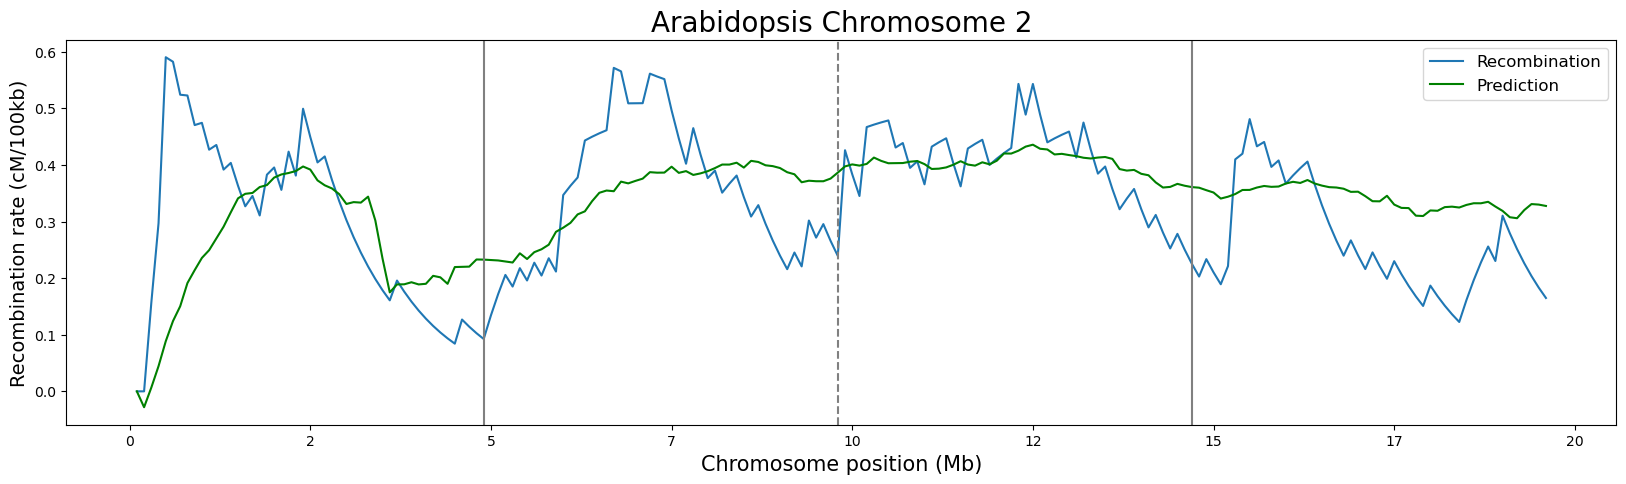

In [7]:
# TRAINING MODEL
X = achr2.drop(['chromosome','window_start','window_end','rec','srec'],axis=1)
y = achr2.srec
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = LinearRegression()
model.fit(X_train, y_train)
model_preds = model.predict(chr2.drop(['chromosome','window_start','window_end','rec','srec'], axis=1))

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr2 = model_spreds      
    
#PARAMETERS
corr_chr2 = pearsonr(chr2.srec, pchr2)
r2_chr2 = r2_score(chr2.srec, pchr2)
mse_chr2 = mean_squared_error(chr2.srec, pchr2)
print('Correlation:', corr_chr2[0])
print('Coefficient of Determination:', r2_chr2)
print('Mean Squared Error:', mse_chr2)

#CORRELATIONS BY QUARTILES
c_q1 = int(len(chr2)*0.25)
c_q2 = int(len(chr2)*0.50)
c_q3 = int(len(chr2)*0.75)

rq1 = chr2['srec'].iloc[0:c_q1]
rq2 = chr2['srec'].iloc[c_q1:c_q2]
rq3 = chr2['srec'].iloc[c_q2:c_q3]
rq4 = chr2['srec'].iloc[c_q3:int(len(chr2))]

pq1 = pchr2[0:c_q1]
pq2 = pchr2[c_q1:c_q2]
pq3 = pchr2[c_q2:c_q3]
pq4 = pchr2[c_q3:int(len(chr2))]

corr_chr2_q1 = pearsonr(rq1, pq1)
corr_chr2_q2 = pearsonr(rq2, pq2)
corr_chr2_q3 = pearsonr(rq3, pq3)
corr_chr2_q4 = pearsonr(rq4, pq4)


# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr2. window_end,chr2.srec, label='Recombination')
ax.plot(chr2. window_end,pchr2, label = 'Prediction',  color ='green')
plt.title('Arabidopsis Chromosome 2',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))

chr_len = chr2["window_end"].iloc[-1]
q1 =round(chr_len * 0.25 / 100000) * 100000
q2 =round(chr_len* 0.50 / 100000) * 100000
q3 =round(chr_len * 0.75 / 100000) * 100000

plt.axvline(x=q1, color='gray', linestyle='-')
plt.axvline(x=q2, color='gray', linestyle='--')
plt.axvline(x=q3, color='gray', linestyle='-')
plt.show()

Correlation: 0.6565230193702872
Coefficient of Determination: 0.34301822938064885
Mean Squared Error: 0.02128576311665068


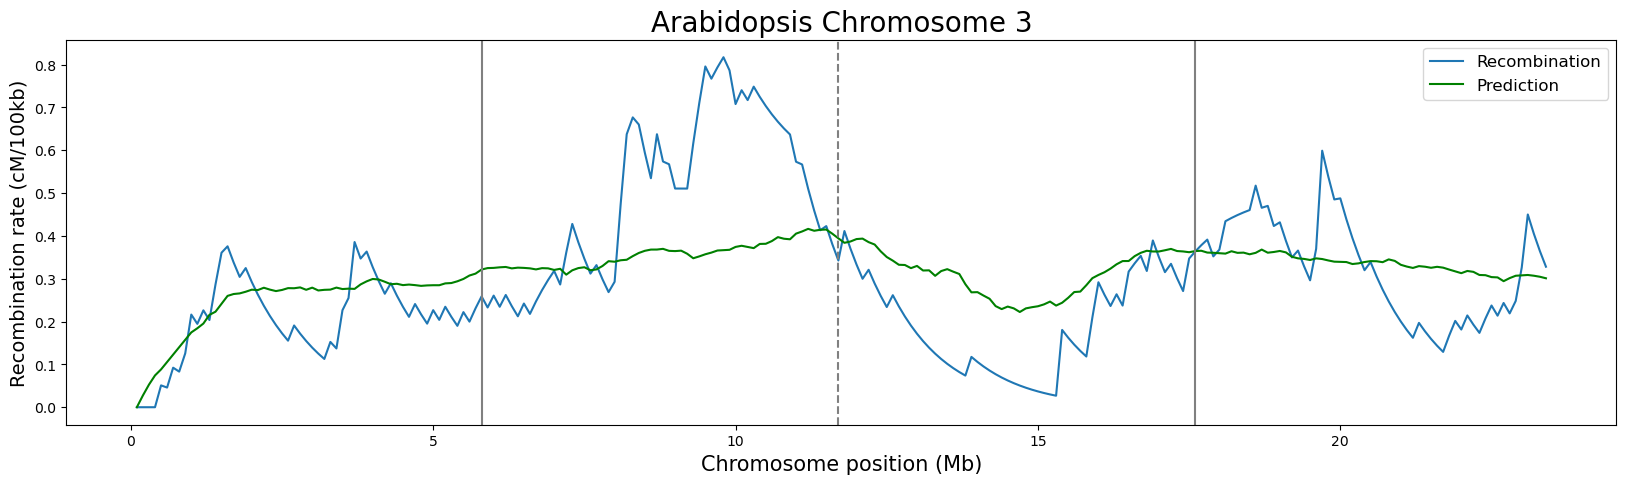

In [8]:
# TRAINING MODEL
X = achr3.drop(['chromosome','window_start','window_end','rec','srec'],axis=1)
y = achr3.srec
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = LinearRegression()
model.fit(X_train, y_train)
model_preds = model.predict(chr3.drop(['chromosome','window_start','window_end','rec','srec'], axis=1))

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr3 = model_spreds      
    
#PARAMETERS
corr_chr3 = pearsonr(chr3.srec, pchr3)
r2_chr3 = r2_score(chr3.srec, pchr3)
mse_chr3 = mean_squared_error(chr3.srec, pchr3)
print('Correlation:', corr_chr3[0])
print('Coefficient of Determination:', r2_chr3)
print('Mean Squared Error:', mse_chr3)

#CORRELATIONS BY QUARTILES
c_q1 = int(len(chr3)*0.25)
c_q2 = int(len(chr3)*0.50)
c_q3 = int(len(chr3)*0.75)

rq1 = chr3['srec'].iloc[0:c_q1]
rq2 = chr3['srec'].iloc[c_q1:c_q2]
rq3 = chr3['srec'].iloc[c_q2:c_q3]
rq4 = chr3['srec'].iloc[c_q3:int(len(chr3))]

pq1 = pchr3[0:c_q1]
pq2 = pchr3[c_q1:c_q2]
pq3 = pchr3[c_q2:c_q3]
pq4 = pchr3[c_q3:int(len(chr3))]

corr_chr3_q1 = pearsonr(rq1, pq1)
corr_chr3_q2 = pearsonr(rq2, pq2)
corr_chr3_q3 = pearsonr(rq3, pq3)
corr_chr3_q4 = pearsonr(rq4, pq4)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr3. window_end,chr3.srec, label='Recombination')
ax.plot(chr3. window_end,pchr3, label = 'Prediction',  color ='green')
plt.title('Arabidopsis Chromosome 3',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))

chr_len = chr3["window_end"].iloc[-1]
q1 =round(chr_len * 0.25 / 100000) * 100000
q2 =round(chr_len* 0.50 / 100000) * 100000
q3 =round(chr_len * 0.75 / 100000) * 100000

plt.axvline(x=q1, color='gray', linestyle='-')
plt.axvline(x=q2, color='gray', linestyle='--')
plt.axvline(x=q3, color='gray', linestyle='-')
plt.show()

Correlation: 0.521664668962835
Coefficient of Determination: 0.06384350827013918
Mean Squared Error: 0.03503113845283504


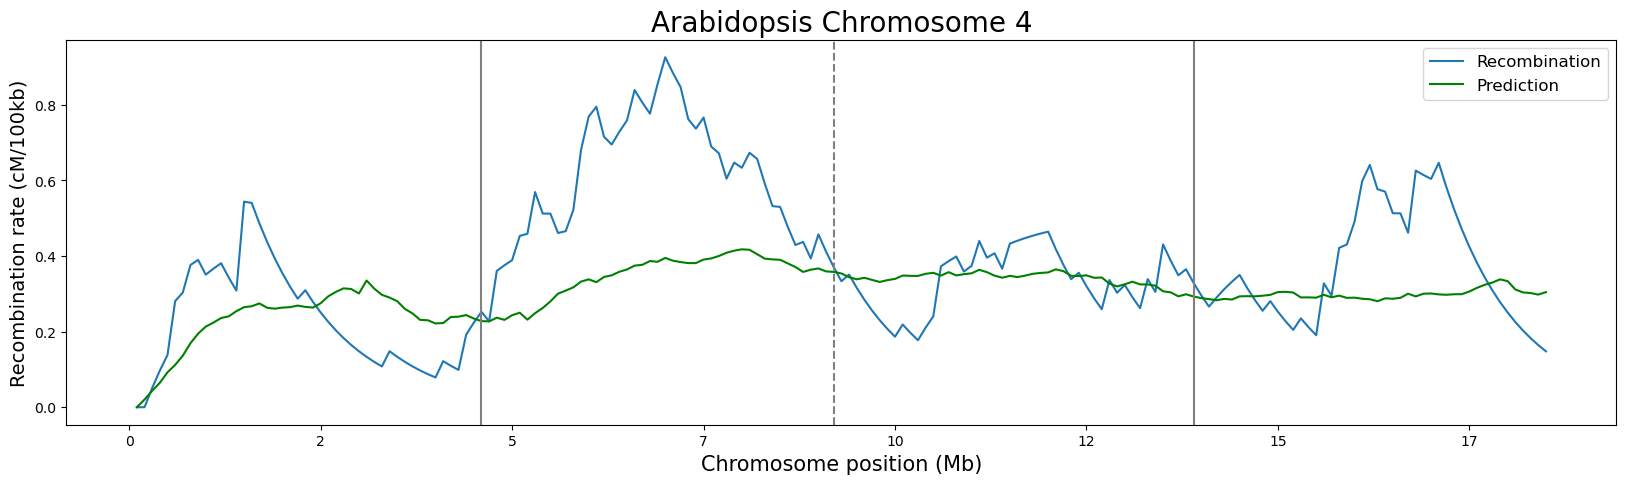

In [9]:
# TRAINING MODEL
X = achr4.drop(['chromosome','window_start','window_end','rec','srec'],axis=1)
y = achr4.srec
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = LinearRegression()
model.fit(X_train, y_train)
model_preds = model.predict(chr4.drop(['chromosome','window_start','window_end','rec','srec'], axis=1))

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr4 = model_spreds      
    
#PARAMETERS
corr_chr4 = pearsonr(chr4.srec, pchr4)
r2_chr4 = r2_score(chr4.srec, pchr4)
mse_chr4 = mean_squared_error(chr4.srec, pchr4)
print('Correlation:', corr_chr4[0])
print('Coefficient of Determination:', r2_chr4)
print('Mean Squared Error:', mse_chr4)

#CORRELATIONS BY QUARTILES
c_q1 = int(len(chr4)*0.25)
c_q2 = int(len(chr4)*0.50)
c_q3 = int(len(chr4)*0.75)

rq1 = chr4['srec'].iloc[0:c_q1]
rq2 = chr4['srec'].iloc[c_q1:c_q2]
rq3 = chr4['srec'].iloc[c_q2:c_q3]
rq4 = chr4['srec'].iloc[c_q3:int(len(chr4))]

pq1 = pchr4[0:c_q1]
pq2 = pchr4[c_q1:c_q2]
pq3 = pchr4[c_q2:c_q3]
pq4 = pchr4[c_q3:int(len(chr4))]

corr_chr4_q1 = pearsonr(rq1, pq1)
corr_chr4_q2 = pearsonr(rq2, pq2)
corr_chr4_q3 = pearsonr(rq3, pq3)
corr_chr4_q4 = pearsonr(rq4, pq4)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr4. window_end,chr4.srec, label='Recombination')
ax.plot(chr4. window_end,pchr4, label = 'Prediction',  color ='green')
plt.title('Arabidopsis Chromosome 4',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))

chr_len = chr4["window_end"].iloc[-1]
q1 =round(chr_len * 0.25 / 100000) * 100000
q2 =round(chr_len* 0.50 / 100000) * 100000
q3 =round(chr_len * 0.75 / 100000) * 100000

plt.axvline(x=q1, color='gray', linestyle='-')
plt.axvline(x=q2, color='gray', linestyle='--')
plt.axvline(x=q3, color='gray', linestyle='-')
plt.show()

Correlation: 0.5006637335955282
Coefficient of Determination: 0.2254189681175549
Mean Squared Error: 0.01679429306022574


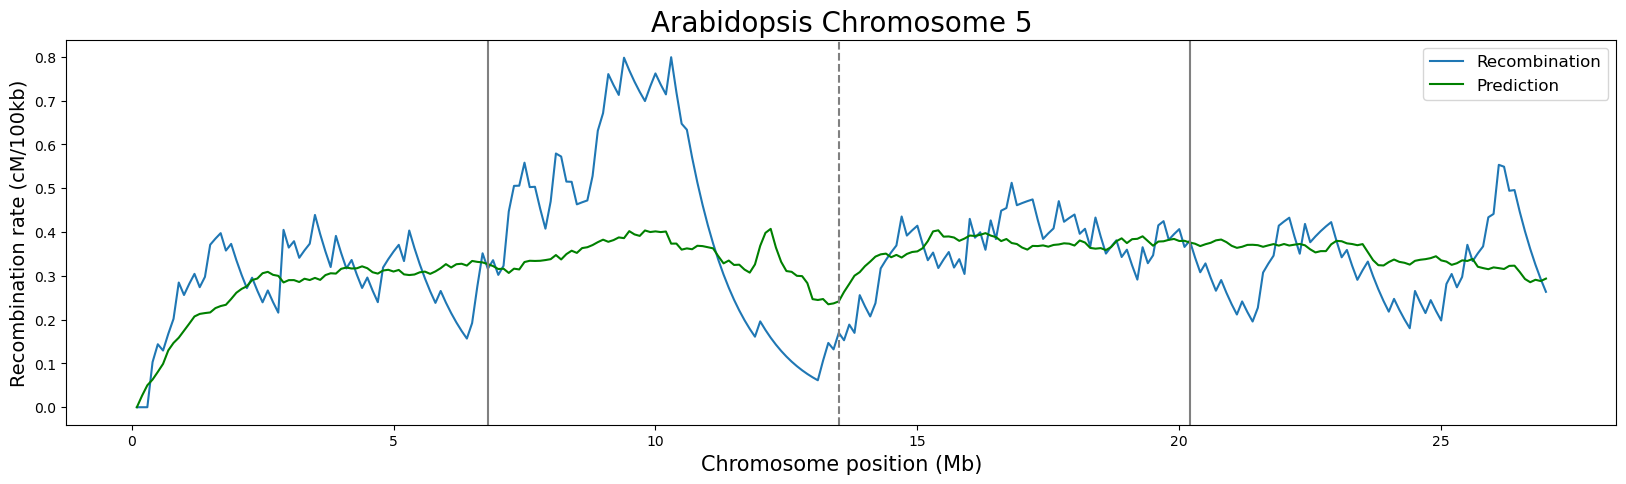

In [10]:
# TRAINING MODEL
X = achr5.drop(['chromosome','window_start','window_end','rec','srec'],axis=1)
y = achr5.srec
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = LinearRegression()
model.fit(X_train, y_train)
model_preds = model.predict(chr5.drop(['chromosome','window_start','window_end','rec','srec'], axis=1))

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr5 = model_spreds      
    
#PARAMETERS
corr_chr5 = pearsonr(chr5.srec, pchr5)
r2_chr5 = r2_score(chr5.srec, pchr5)
mse_chr5 = mean_squared_error(chr5.srec, pchr5)
print('Correlation:', corr_chr5[0])
print('Coefficient of Determination:', r2_chr5)
print('Mean Squared Error:', mse_chr5)

#CORRELATIONS BY QUARTILES
c_q1 = int(len(chr5)*0.25)
c_q2 = int(len(chr5)*0.50)
c_q3 = int(len(chr5)*0.75)

rq1 = chr5['srec'].iloc[0:c_q1]
rq2 = chr5['srec'].iloc[c_q1:c_q2]
rq3 = chr5['srec'].iloc[c_q2:c_q3]
rq4 = chr5['srec'].iloc[c_q3:int(len(chr5))]

pq1 = pchr5[0:c_q1]
pq2 = pchr5[c_q1:c_q2]
pq3 = pchr5[c_q2:c_q3]
pq4 = pchr5[c_q3:int(len(chr5))]

corr_chr5_q1 = pearsonr(rq1, pq1)
corr_chr5_q2 = pearsonr(rq2, pq2)
corr_chr5_q3 = pearsonr(rq3, pq3)
corr_chr5_q4 = pearsonr(rq4, pq4)


# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr5. window_end,chr5.srec, label='Recombination')
ax.plot(chr5. window_end,pchr5, label = 'Prediction',  color ='green')
plt.title('Arabidopsis Chromosome 5',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))

chr_len = chr5["window_end"].iloc[-1]
q1 =round(chr_len * 0.25 / 100000) * 100000
q2 =round(chr_len* 0.50 / 100000) * 100000
q3 =round(chr_len * 0.75 / 100000) * 100000

plt.axvline(x=q1, color='gray', linestyle='-')
plt.axvline(x=q2, color='gray', linestyle='--')
plt.axvline(x=q3, color='gray', linestyle='-')
plt.show()

# Compilation of the prediction results

In [11]:
corr = pd.DataFrame({'corr':[corr_chr1[0], corr_chr2[0], corr_chr3[0], corr_chr4[0], corr_chr5[0]]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5']})
results = pd.concat([index, corr, r2, mse], axis=1)
results

,chr,corr,R^2,MSE
0,chr1,0.617504,0.338034,0.017754
1,chr2,0.490805,0.208956,0.012773
2,chr3,0.656523,0.343018,0.021286
3,chr4,0.521665,0.063844,0.035031
4,chr5,0.500664,0.225419,0.016794


In [12]:
results.describe()

,corr,R^2,MSE
count,5.000000,5.000000,5.000000
mean,0.557432,0.235854,0.020728
std,0.074781,0.114395,0.008551
min,0.490805,0.063844,0.012773
25%,0.500664,0.208956,0.016794
50%,0.521665,0.225419,0.017754
75%,0.617504,0.338034,0.021286
max,0.656523,0.343018,0.035031


Correlation between model predictions and recombination rates by quartiles

In [13]:
corr_q1 = pd.DataFrame({'Q1':[corr_chr1_q1[0], corr_chr2_q1[0], corr_chr3_q1[0], corr_chr4_q1[0], corr_chr5_q1[0]]})
corr_q2 = pd.DataFrame({'Q2':[corr_chr1_q2[0], corr_chr2_q2[0], corr_chr3_q2[0], corr_chr4_q2[0], corr_chr5_q2[0]]})
corr_q3 = pd.DataFrame({'Q3':[corr_chr1_q3[0], corr_chr2_q3[0], corr_chr3_q3[0], corr_chr4_q3[0], corr_chr5_q3[0]]})
corr_q4 = pd.DataFrame({'Q4':[corr_chr1_q4[0], corr_chr2_q4[0], corr_chr3_q4[0], corr_chr4_q4[0], corr_chr5_q4[0]]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled

,chr,Q1,Q2,Q3,Q4
0,chr1,0.738482,0.700192,0.220529,0.643294
1,chr2,0.397963,0.518493,0.847352,0.688946
2,chr3,0.710736,0.560388,0.886457,0.588353
3,chr4,0.289369,0.579644,0.135301,-0.265847
4,chr5,0.619667,0.726971,0.581830,-0.112569


# GENERAL STATISTICS ON ALL DATA

### Correlation of features with respect to recombination.

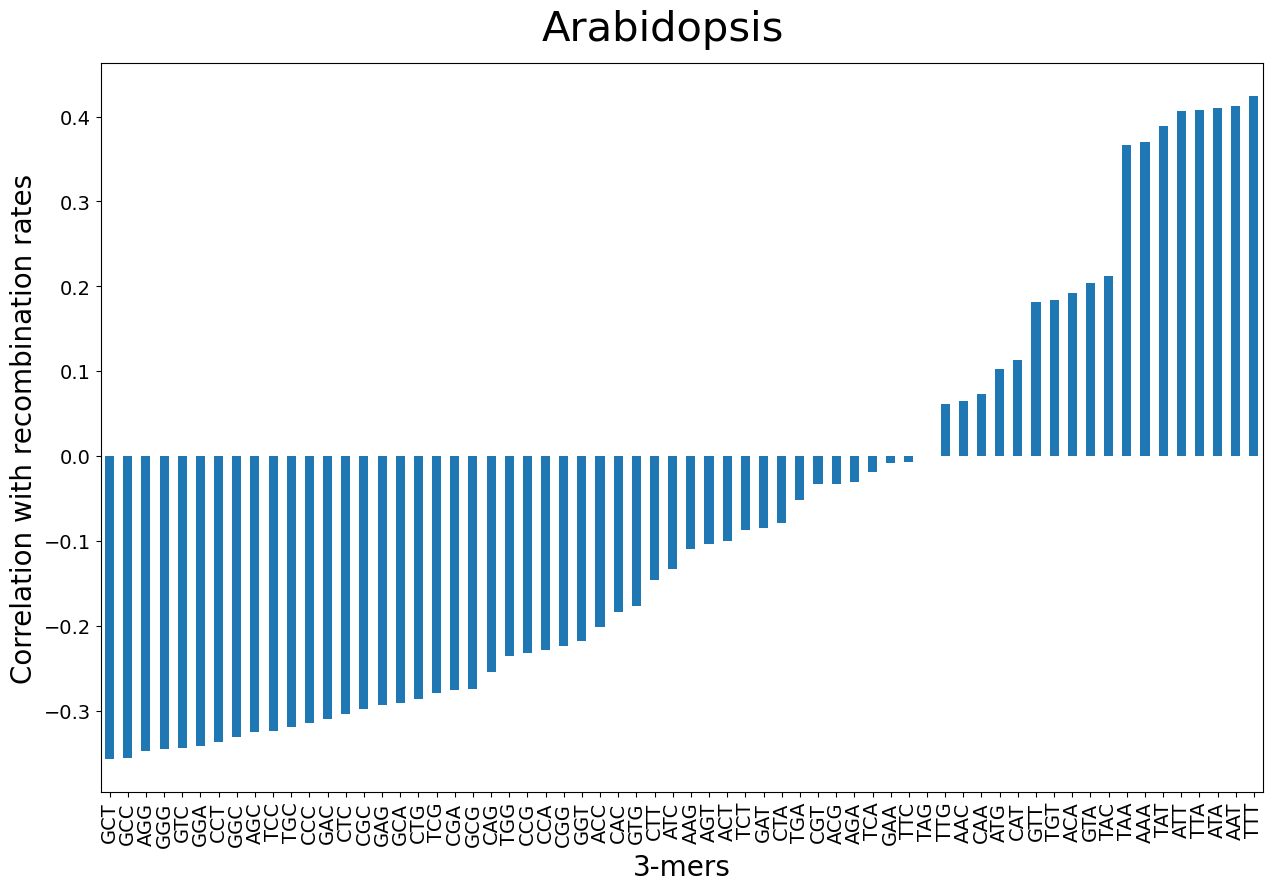

In [14]:
df_stats = df.drop(['chromosome','window_start','window_end','rec'],  axis=1)
df_corr = df_stats.corr()
df_corr = df_corr.iloc[:-1, :]

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
df_corr['srec'].sort_values(ascending = True).plot(kind = 'bar')
ax.set_xlabel('3-mers', fontsize=20)
ax.set_ylabel('Correlation with recombination rates', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.suptitle('Arabidopsis', fontsize=30)
plt.subplots_adjust(top=0.92)

plt.show()

### Model training with all data

In [15]:
X = df.drop(['chromosome','window_start','window_end','rec','srec'],axis=1)
y = df.srec

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

model =  LinearRegression().fit(X_train, y_train)

### Linear regression coefficients

In [16]:
coefficients = np.around(model.coef_, 4)
intercept = model.intercept_
table_coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': coefficients})
table_coefficients = pd.concat([table_coefficients, pd.DataFrame({'Variable': ['Intercept'], 'Coefficient': [intercept]})], ignore_index=True)
table_coefficients = table_coefficients.transpose()
table_coefficients.columns = table_coefficients.iloc[0]
table_coefficients = table_coefficients.iloc[1:]

arabidopsis_lm = table_coefficients
arabidopsis_lm.head()

Variable,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,Intercept
Coefficient,0.0,-0.0181,-0.0253,0.005,0.0275,-0.018,0.032,0.032,0.008,0.0418,...,0.0216,-0.0267,0.0071,-0.0125,-0.0262,0.0315,-0.0017,0.0152,0.0001,0.031492


In [17]:
arabidopsis_lm.to_csv('./arabidopsis_3mers_linear_coefficients.csv', index=False) # To save the coefficients in a csv file.

### Evaluation of Shap values

PermutationExplainer explainer: 1190it [00:31, 28.24it/s]                                                              


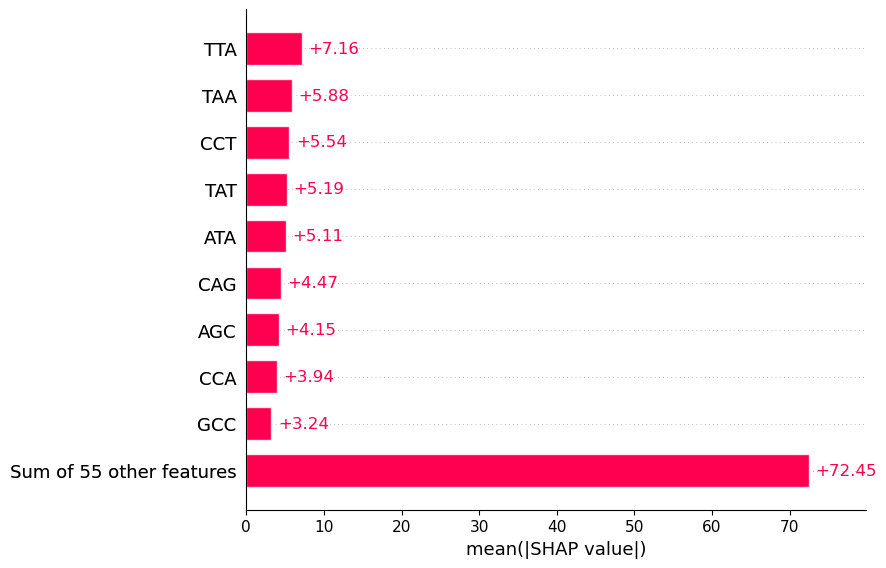

In [18]:
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)
shap.plots.bar(shap_values)